In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# 获取当前脚本所在目录的绝对路径
current_path = os.getcwd()

# 构建附件1.xlsx和附件4.xlsx的相对路径
path_file1 = os.path.join(current_path, '附件1.xlsx')
path_file2 = os.path.join(current_path,'附件2.xlsx')

# 打印路径以进行调试
print(path_file1)
print(path_file2)
# 读取附件1.xlsx
df1 = pd.read_excel(path_file1)
# 读取附件2.xlsx
df2 = pd.read_excel(path_file2)

# 打印数据框的前几行，查看数据
print(df1.head())
print(df2.head())

df_merge = pd.merge(df1,df2,on='单品编码',how='inner')
df_merge['总销售额']=df_merge['销量(千克)']*df_merge['销售单价(元/千克)']

df_result1 = df_merge.groupby('单品编码').agg({'销量(千克)':'sum','总销售额':'sum'}).reset_index()
df_result2 = df_merge.groupby('分类编码').agg({'销量(千克)':'sum','总销售额':'sum'}).reset_index()

print(df_result1.to_string())
print(df_result2.to_string())


c:\Users\hxq11\Desktop\mathematical-modeling\实战1\真题模拟\2023国赛C\附件1.xlsx
c:\Users\hxq11\Desktop\mathematical-modeling\实战1\真题模拟\2023国赛C\附件2.xlsx
              单品编码    单品名称        分类编码 分类名称
0  102900005115168    牛首生菜  1011010101  花叶类
1  102900005115199   四川红香椿  1011010101  花叶类
2  102900005115625  本地小毛白菜  1011010101  花叶类
3  102900005115748     白菜苔  1011010101  花叶类
4  102900005115762      苋菜  1011010101  花叶类
        销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型 是否打折销售
0 2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售      否
1 2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售      否
2 2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售      否
3 2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售      否
4 2020-07-01  09:20:23.686  102900005115908   0.539         8.0   销售      否
                单品编码     销量(千克)         总销售额
0    102900005115168    899.837    3506.0886
1    102900005115199    333.223   10547.7653
2  

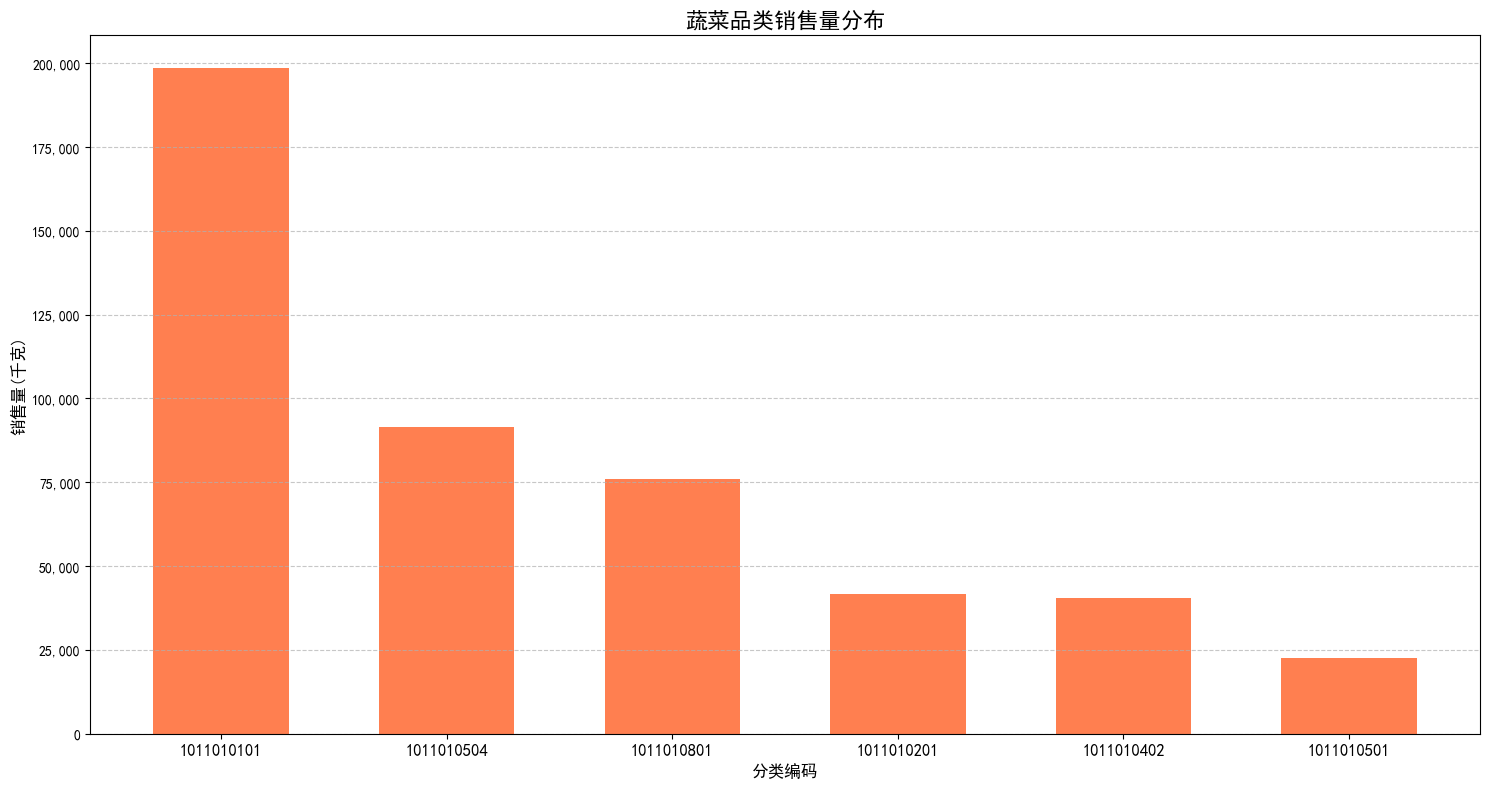

In [4]:
#########################################  品类销售量分布 ##################################################
# 按销售量降序排序
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

df_result2_sorted = df_result2.sort_values('销量(千克)', ascending=False)

# 计算累计销售量占比
df_result2_sorted['累计销售量占比'] = df_result2_sorted['销量(千克)'].cumsum() / df_result2_sorted['销量(千克)'].sum()
df_result2

def format_func(value, tick_number):
    return f'{value:,.0f}'

# 绘制品类销售量分布图
plt.figure(figsize=(15, 8))  # 保持图表大小

# 创建均匀间隔的 x 轴
x = np.arange(len(df_result2_sorted))

# 使用新的 x 轴绘制柱状图
plt.bar(x, df_result2_sorted['销量(千克)'], 
        alpha=1, color='coral', width=0.6)  # 使用相对宽度

plt.title('蔬菜品类销售量分布', fontsize=16)
plt.xlabel('分类编码', fontsize=12)
plt.ylabel('销售量(千克)', fontsize=12)

# 设置 x 轴刻度和标签
plt.xticks(x, df_result2_sorted['分类编码'], rotation=0, ha='center', fontsize=12)

# 应用格式化到 y 轴
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

# 添加网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 如果 x 轴标签太多，可以考虑只显示部分
if len(df_result2_sorted) > 20:
    plt.xticks(x[::2], df_result2_sorted['分类编码'][::2], rotation=45, ha='center')

plt.tight_layout()
plt.show()